In [283]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import seaborn as sns
import matplotlib.pyplot as plt

## Explorative data analysis

In [284]:

df_movies = pd.read_csv("../data/Large-data/ml-latest/movies.csv")
df_ratings = pd.read_csv("../data/Large-data/ml-latest/ratings.csv")

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [285]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [286]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [287]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


## Finding the 10 most rated movies

In [288]:
most_rated = df_ratings["movieId"].value_counts().head(10).reset_index().rename(columns={"index": "movieId", "movieId": "times_rated"})
most_rated

,movieId,times_rated
0,318,97999
1,356,97040
2,296,92406
3,593,87899
4,2571,84545
5,260,81815
6,480,76451
7,527,71516
8,110,68803
9,1,68469


In [289]:
most_rated_movies = df_movies[df_movies["movieId"].isin(most_rated["movieId"])]
most_rated_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
108,110,Braveheart (1995),Action|Drama|War
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
315,318,"Shawshank Redemption, The (1994)",Crime|Drama
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War
476,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
523,527,Schindler's List (1993),Drama|War
587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2487,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [290]:
most_rated_movies = most_rated_movies.join(most_rated.set_index("movieId"), on="movieId").sort_values("times_rated", ascending=False)

<Axes: xlabel='times_rated', ylabel='title'>

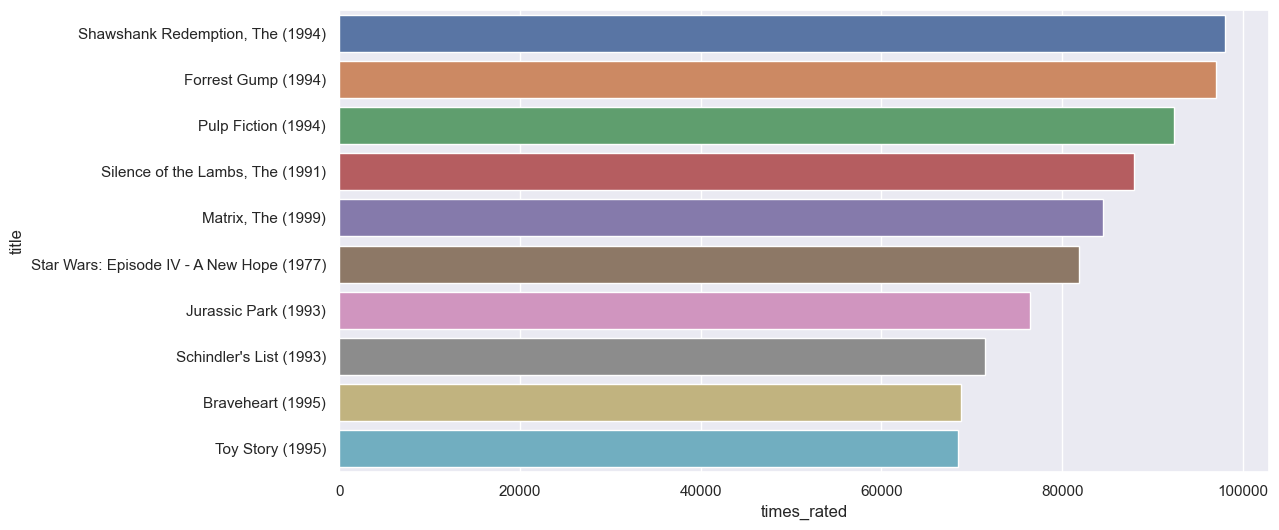

In [291]:
sns.barplot(data=most_rated_movies, y="title", x="times_rated")

In [292]:
# average rating for these 10 movies
avg_rating = df_ratings[df_ratings["movieId"].isin(most_rated["movieId"])]
avg_rating["rating"].mean()

4.102288186731129

## Sorting movies by year

In [293]:
# picks out things in ()
#years = df_movies["title"].str.extract("\((.*?)\)")

# picks out any sequense of 4 digits
#years = df_movies["title"].str.extract("(\d{4})")

# picks out sequense of 4 digits within ()
years = df_movies["title"].str.extract("\((\d{4})\)")

df_movies["year"] = years
# changes non numbers to null
#df_movies["year"] = df_movies["year"].replace("[^\d]+", "", regex=True)

# convert to year (does not work atm)
#df_movies["year"] = df_movies["year"].astype(int)

df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),1946
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011
58095,193880,Her Name Was Mumu (2016),Drama,2016
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017


In [294]:
df_movies["year"].unique()

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950',
       '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972',
       '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', nan, '1903',
       '2007', '2008', '2009', '1912', '2010', '1913', '2011', '1898',
       '1899', '1894', '2012', '1909', '1910', '1901', '1893', '2013',
       '1

In [295]:
df_movies["year"].value_counts()

2015    2312
2014    2297
2016    2219
2013    2187
2012    2019
        ... 
1887       1
1878       1
1874       1
1893       1
1883       1
Name: year, Length: 134, dtype: int64

In [299]:
df_movies[df_movies["year"].isnull()]

,movieId,title,genres,year


In [297]:
df_movies = df_movies[df_movies["year"].notna()]
df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),1946
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011
58095,193880,Her Name Was Mumu (2016),Drama,2016
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017


In [315]:
movies_year = df_movies["year"].value_counts().reset_index().rename(columns={"index": "year", "year": "movies_released"}).sort_values("year")
movies_year

,year,movies_released
131,1874,1
130,1878,1
133,1883,1
129,1887,1
127,1888,4
...,...,...
1,2014,2297
0,2015,2312
2,2016,2219
6,2017,1891


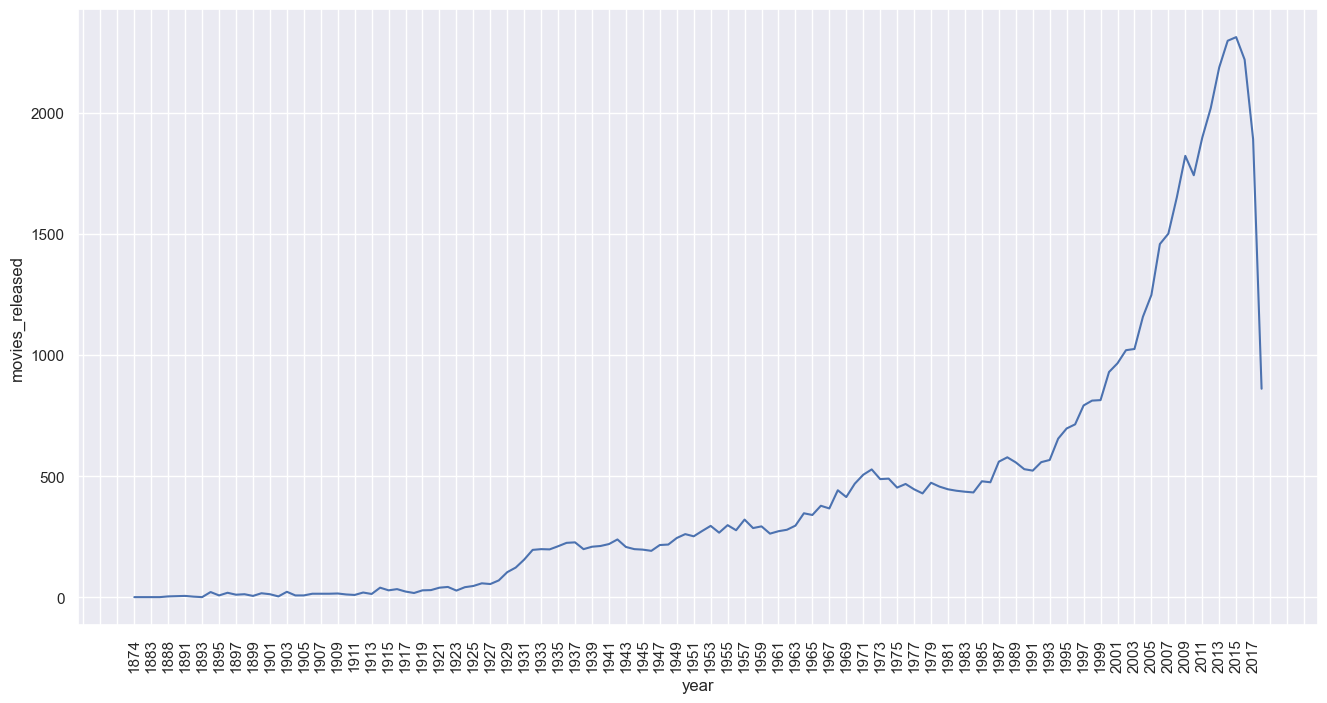

In [335]:
fig = plt.subplots(figsize=(16,8))
ax = sns.lineplot(data=movies_year, x="year", y="movies_released")
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(80));